In [1]:
import pandas as pd
import numpy as np
import json
import os
from tqdm import tqdm
import time
import re
from IPython.display import display
from pathlib import Path 
DATAPATH = Path(r'Data')

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
filepath = 'games_Ligue-1-2015-2022.csv'

In [3]:
games = pd.read_csv(DATAPATH /filepath)

In [4]:
with pd.option_context('display.max_columns', None) :
    display(games.describe())


GAME_ID    SEASON_ID  TEAM_ID_HOME  TEAM_ID_AWAY     gameweek  \
count  2.559000e+03  2559.000000   2559.000000   2559.000000  2559.000000   
mean   2.018641e+06     2.960531     15.005471     15.015631    18.949590   
std    2.111933e+03     2.029398      8.086222      8.090607    10.804114   
min    2.015001e+06     0.000000      0.000000      0.000000     1.000000   
25%    2.017072e+06     1.000000      9.000000      9.000000    10.000000   
50%    2.018341e+06     3.000000     16.000000     16.000000    19.000000   
75%    2.020232e+06     5.000000     22.000000     22.000000    28.000000   
max    2.022380e+06     6.000000     28.000000     28.000000    38.000000   

       possession_home  possession_away  shot_on_target_home  \
count      2559.000000      2559.000000          2559.000000   
mean          0.514893         0.485311             4.375537   
std           0.103908         0.103939             2.361248   
min           0.220000         0.200000             0.000000   
25%           0.440000         0.410000             3.000000   
50%           0.520000         0.480000             4.000000   
75%           0.590000         0.560000             6.000000   
max           0.800000         0.780000            15.000000   

       shot_on_target_away   saves_home   saves_away         year  \
count          2559.000000  2559.000000  2559.000000  2559.000000   
mean              3.623290     2.560766     3.003908  2018.456428   
std               2.174812     1.767828     1.883217     2.089747   
min               0.000000     0.000000     0.000000  2015.000000   
25%               2.000000     1.000000     2.000000  2017.000000   
50%               3.000000     2.000000     3.000000  2018.000000   
75%               5.000000     4.000000     4.000000  2020.000000   
max              15.000000    11.000000    12.000000  2022.000000   

           quarter        month         week          day      weekday  \
count  2559.000000  2559.000000  2559.000000  2559.000000  2559.000000   
mean      2.499414     6.498242    26.146542    15.763189     4.913247   
std       1.212353     3.850497    16.903882     8.553344     1.292720   
min       1.000000     1.000000     1.000000     1.000000     0.000000   
25%       1.000000     3.000000     9.000000     8.000000     5.000000   
50%       3.000000     8.000000    31.000000    16.000000     5.000000   
75%       4.000000    10.000000    42.000000    23.000000     6.000000   
max       4.000000    12.000000    52.000000    31.000000     6.000000   

         is_monday   is_tuesday  is_wednesday  is_thursday    is_friday  \
count  2559.000000  2559.000000   2559.000000  2559.000000  2559.000000   
mean      0.000782     0.020320      0.094959     0.001954     0.091833   
std       0.027951     0.141122      0.293216     0.044168     0.288846   
min       0.000000     0.000000      0.000000     0.000000     0.000000   
25%       0.000000     0.000000      0.000000     0.000000     0.000000   
50%       0.000000     0.000000      0.000000     0.000000     0.000000   
75%       0.000000     0.000000      0.000000     0.000000     0.000000   
max       1.000000     1.000000      1.000000     1.000000     1.000000   

       is_saturday    is_sunday  shot_total_home  shot_total_away  \
count  2559.000000  2559.000000      2559.000000      2559.000000   
mean      0.411098     0.379054        13.085190        10.733490   
std       0.492129     0.485246         4.777432         4.335168   
min       0.000000     0.000000         1.000000         0.000000   
25%       0.000000     0.000000        10.000000         8.000000   
50%       0.000000     0.000000        13.000000        10.000000   
75%       1.000000     1.000000        16.000000        13.000000   
max       1.000000     1.000000        35.000000        30.000000   

       saves_total_home  saves_total_away    goal_home    goal_away  \
count       2559.000000       2559.000000  2559.000000  2559.000000   
mean        

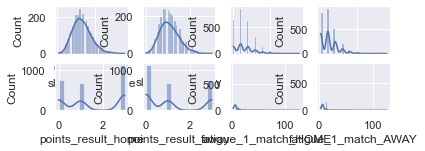

In [5]:
value_list = ['shot_total_home', 'shot_total_away', 
              'goal_home', 'goal_away', 
              'points_result_home', 'points_result_away',
              'fatigue_1_match_HOME', 'fatigue_1_match_AWAY'
             ]

sns.set(rc={'figure.figsize':(25,25)})
for i, column in enumerate(value_list, 1):
    plt.subplot(4,4,i)
    p=sns.histplot(x=column, data=games, stat='count', kde=True)

## Correlation

In [6]:
# If home wins : 2, draw : 1, Lose : 0
games['HOME_WINS'] = np.where(games["points_result_home"] == 3, 3,
         np.where(games["points_result_home"] == 1, 1,
                  0))

In [7]:
features = ['HOME_WINS',
       'possession_home', 'possession_away', 'shot_on_target_home',
       'shot_on_target_away', 'saves_home', 'saves_away', 'year',
       'quarter', 'month', 'week', 'day', 'weekday', 'is_monday',
       'is_tuesday', 'is_wednesday', 'is_thursday', 'is_friday',
       'is_saturday', 'is_sunday', 'shot_total_home', 'shot_total_away',
       'saves_total_home', 'saves_total_away', 'goal_home', 'goal_away',
       'points_result_home', 'points_result_away',
       'cumul_points_result_HOME', 'cumul_shot_on_target_HOME',
       'cumul_saves_HOME', 'cumul_shot_total_HOME', 'cumul_goal_HOME',
       'cumul_points_result_against_HOME',
       'cumul_shot_on_target_against_HOME', 'cumul_saves_against_HOME',
       'cumul_shot_total_against_HOME', 'cumul_goal_against_HOME',
       'goal_difference_HOME', 'cumul_average_points_result_HOME',
       'cumul_average_shot_on_target_HOME', 'cumul_average_saves_HOME',
       'cumul_average_shot_total_HOME', 'cumul_average_goal_HOME',
       'cumul_average_points_result_against_HOME',
       'cumul_average_shot_on_target_against_HOME',
       'cumul_average_saves_against_HOME',
       'cumul_average_shot_total_against_HOME',
       'cumul_average_goal_against_HOME',
       'moving_average_2_points_result_HOME',
       'moving_average_2_goal_HOME',
       'moving_average_2_points_result_against_HOME',
       'moving_average_2_goal_against_HOME',
       'moving_average_3_points_result_HOME',
       'moving_average_3_goal_HOME',
       'moving_average_3_points_result_against_HOME',
       'moving_average_3_goal_against_HOME',
       'moving_average_6_points_result_HOME',
       'moving_average_6_goal_HOME',
       'moving_average_6_points_result_against_HOME',
       'moving_average_6_goal_against_HOME', 'fatigue_1_match_HOME',
       'fatigue_2_match_HOME', 'fatigue_3_match_HOME',
       'cumul_points_result_AWAY', 'cumul_shot_on_target_AWAY',
       'cumul_saves_AWAY', 'cumul_shot_total_AWAY', 'cumul_goal_AWAY',
       'cumul_points_result_against_AWAY',
       'cumul_shot_on_target_against_AWAY', 'cumul_saves_against_AWAY',
       'cumul_shot_total_against_AWAY', 'cumul_goal_against_AWAY',
       'goal_difference_AWAY', 'cumul_average_points_result_AWAY',
       'cumul_average_shot_on_target_AWAY', 'cumul_average_saves_AWAY',
       'cumul_average_shot_total_AWAY', 'cumul_average_goal_AWAY',
       'cumul_average_points_result_against_AWAY',
       'cumul_average_shot_on_target_against_AWAY',
       'cumul_average_saves_against_AWAY',
       'cumul_average_shot_total_against_AWAY',
       'cumul_average_goal_against_AWAY',
       'moving_average_2_points_result_AWAY',
       'moving_average_2_goal_AWAY',
       'moving_average_2_points_result_against_AWAY',
       'moving_average_2_goal_against_AWAY',
       'moving_average_3_points_result_AWAY',
       'moving_average_3_goal_AWAY',
       'moving_average_3_points_result_against_AWAY',
       'moving_average_3_goal_against_AWAY',
       'moving_average_6_points_result_AWAY',
       'moving_average_6_goal_AWAY',
       'moving_average_6_points_result_against_AWAY',
       'moving_average_6_goal_against_AWAY', 'fatigue_1_match_AWAY',
       'fatigue_2_match_AWAY', 'fatigue_3_match_AWAY'
]

<AxesSubplot:>

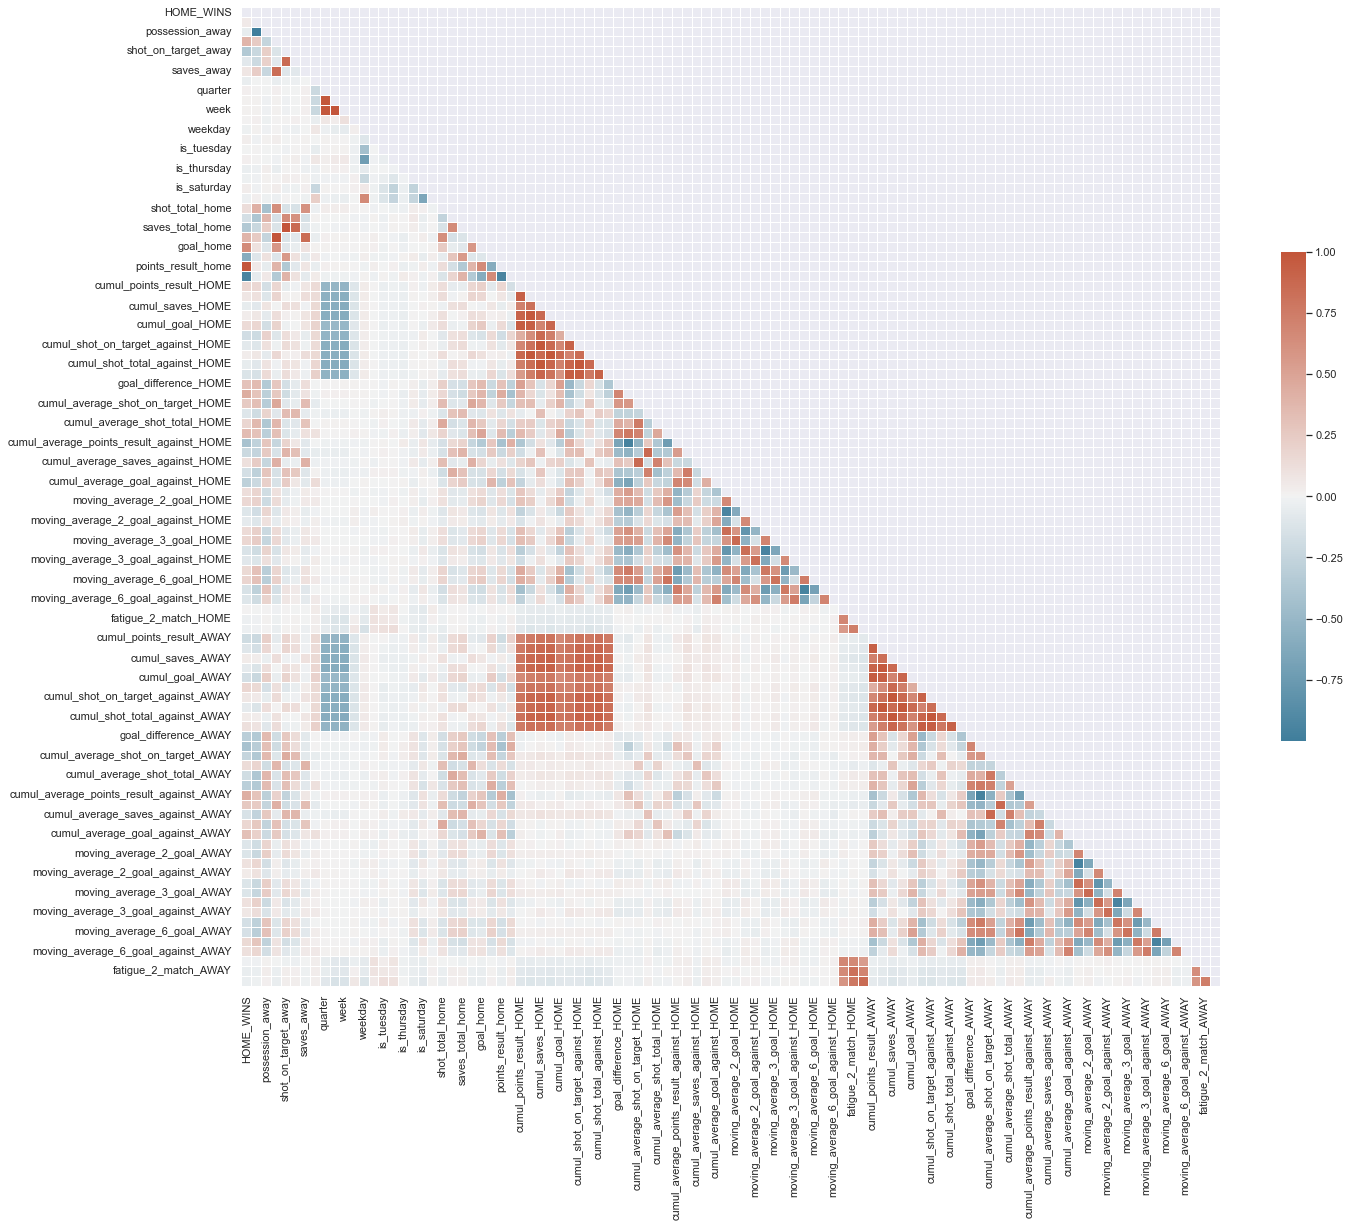

In [8]:
# Compute the correlation matrix
corr = games[features].corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(22, 18))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### correlation with target (Home wins)

<AxesSubplot:>

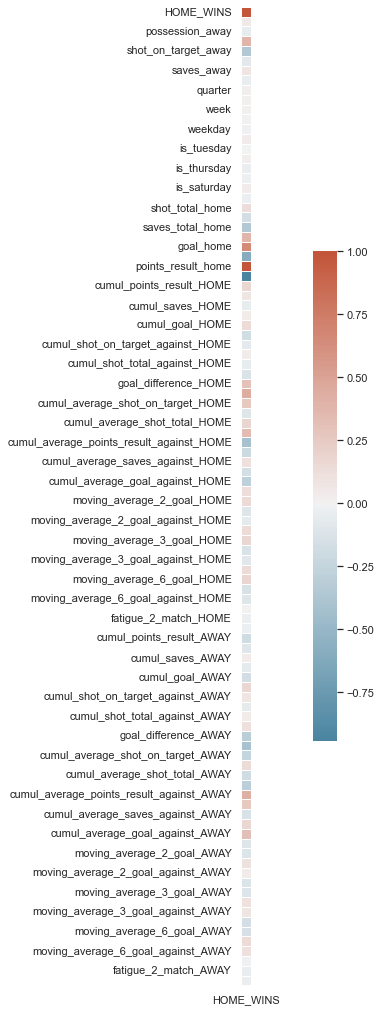

In [9]:
# Compute the correlation matrix
target_corr = pd.DataFrame(corr["HOME_WINS"])

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(22, 18))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(target_corr, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [10]:
target_corr

HOME_WINS
HOME_WINS                                     1.000000
possession_home                               0.050944
possession_away                              -0.050989
shot_on_target_home                           0.383080
shot_on_target_away                          -0.355308
...                                                ...
moving_average_6_points_result_against_AWAY   0.148636
moving_average_6_goal_against_AWAY            0.117227
fatigue_1_match_AWAY                         -0.009483
fatigue_2_match_AWAY                         -0.039386
fatigue_3_match_AWAY                         -0.036583

[100 rows x 1 columns]

In [11]:
target_corr.sort_values(by = "HOME_WINS", ascending = False)

HOME_WINS
HOME_WINS                                  1.000000
points_result_home                         1.000000
goal_home                                  0.655121
cumul_average_points_result_HOME           0.439242
cumul_average_points_result_against_AWAY   0.428803
...                                             ...
shot_on_target_away                       -0.355308
cumul_average_points_result_AWAY          -0.406802
cumul_average_points_result_against_HOME  -0.412255
goal_away                                 -0.599830
points_result_away                        -0.941977

[100 rows x 1 columns]

## Split data into train/test set

In [12]:
# train : 2015-2021 /  test : 2021-2022
last_season_train = games['SEASON_ID'].unique()[-2]
last_season_test = games['SEASON_ID'].unique()[-1]

train = games[games['SEASON_ID'] < (last_season_train)]
test = games[games['SEASON_ID'] >= (last_season_test)]

train.to_csv(DATAPATH / "train.csv",index=False)
test.to_csv(DATAPATH / "test.csv",index=False)



In [13]:
# Comment to see change